In [0]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape
train_images[0,23,23] 

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

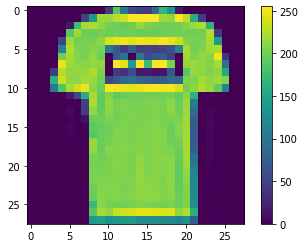

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8774
Test accuracy: 0.8773999810218811


In [0]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([1.8732385e-08, 2.8055094e-10, 4.4395382e-10, 2.8941352e-10,
       1.1178803e-10, 8.1008846e-05, 7.8793811e-08, 8.8390652e-03,
       5.5908039e-08, 9.9107987e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [27]:
predicted_class = class_names[np.argmax(predictions[0])]
print(predicted_class)

Ankle boot


Pick a number: 9


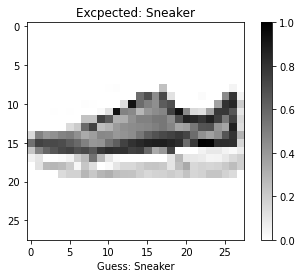

In [30]:
def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
